In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [35]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from glob import glob

In [37]:
#Visualization
x_data =[]
y_data =[]
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 9999/9999 [00:05<00:00, 1888.54it/s]


In [38]:
data.shape
data.dtypes

,0
image,object
label,object


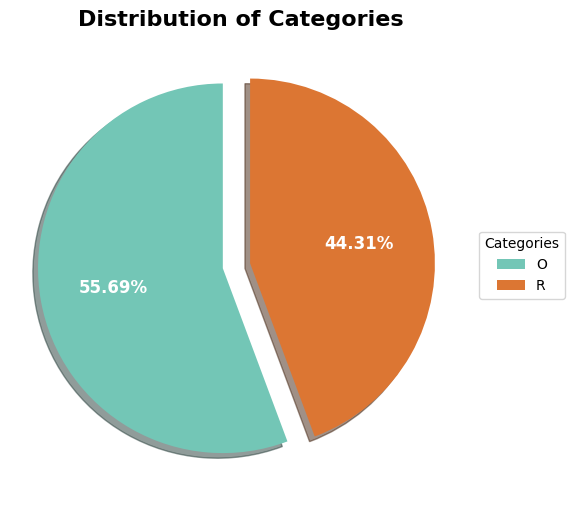

In [39]:
value_counts = data['label'].value_counts()
if len(value_counts) == 2:
    labels = value_counts.index.tolist()
    counts = value_counts.values.tolist()


    colors = ["#73c6b6", "#dc7633"]
    explode = [0.1 if count == max(counts) else 0.05 for count in counts]


    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=labels,
        autopct="%0.2f%%",
        colors=colors,
        startangle=90,
        explode=explode,
        shadow=True,
        textprops={'color': "w"},
    )

    ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=12, weight="bold")
    plt.title("Distribution of Categories", fontsize=16, weight="bold")
    plt.show()

else:
    print(f"Error: The data doesn't contain exactly two categories. Found {len(value_counts)} categories.")

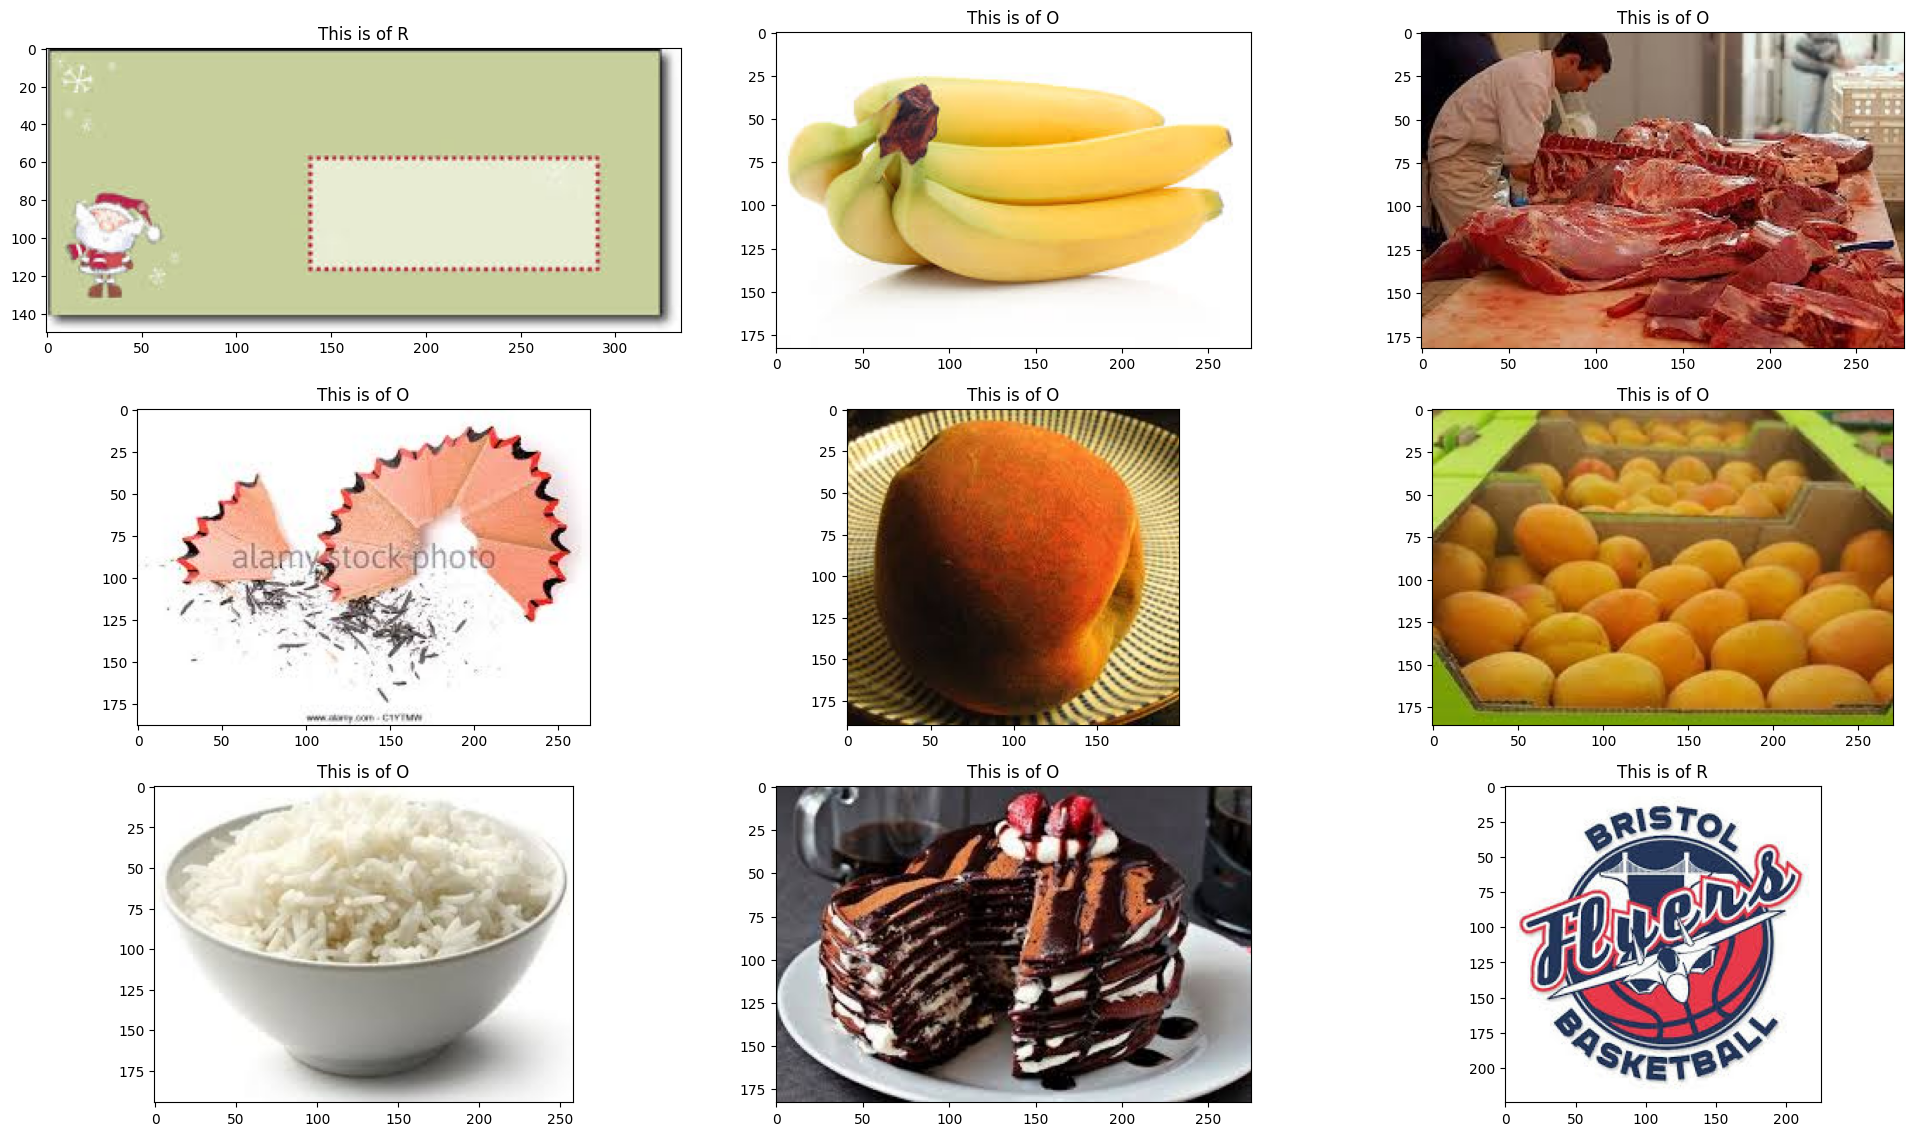

In [40]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [41]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [45]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
checkpoint_path = "/content/drive/MyDrive/model_checkpoints/epoch-{epoch:02d}-val_acc-{val_accuracy:.2f}.h5"

In [47]:
checkpoint_path = "model_checkpoints/epoch-{epoch:02d}-val_acc-{val_accuracy:.2f}.h5"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=False,
    mode="max",
    verbose=1
)


hist = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=[checkpoint_callback]
)


Epoch 1/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7438 - loss: 0.5573
Epoch 1: val_accuracy improved from -inf to 0.83406, saving model to model_checkpoints/epoch-01-val_acc-0.83.h5


353/353 ━━━━━━━━━━━━━━━━━━━━ 3202s 9s/step - accuracy: 0.7440 - loss: 0.5570 - val_accuracy: 0.8341 - val_loss: 0.3888
Epoch 2/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8345 - loss: 0.4043
Epoch 2: val_accuracy improved from 0.83406 to 0.87107, saving model to model_checkpoints/epoch-02-val_acc-0.87.h5


353/353 ━━━━━━━━━━━━━━━━━━━━ 2902s 8s/step - accuracy: 0.8345 - loss: 0.4043 - val_accuracy: 0.8711 - val_loss: 0.3269
Epoch 3/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8578 - loss: 0.3531
Epoch 3: val_accuracy improved from 0.87107 to 0.90370, saving model to model_checkpoints/epoch-03-val_acc-0.90.h5


353/353 ━━━━━━━━━━━━━━━━━━━━ 2913s 8s/step - accuracy: 0.8578 - loss: 0.3531 - val_accuracy: 0.9037 - val_loss: 0.2636
Epoch 4/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8674 - loss: 0.3416
Epoch 4: val_accuracy did not improve from 0.90370
353/353 ━━━━━━━━━━━━━━━━━━━━ 2935s 8s/step - accuracy: 0.8674 - loss: 0.3416 - val_accuracy: 0.8858 - val_loss: 0.3158
Epoch 5/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8821 - loss: 0.2990
Epoch 5: val_accuracy improved from 0.90370 to 0.91007, saving model to model_checkpoints/epoch-05-val_acc-0.91.h5


353/353 ━━━━━━━━━━━━━━━━━━━━ 2880s 8s/step - accuracy: 0.8821 - loss: 0.2990 - val_accuracy: 0.9101 - val_loss: 0.2565


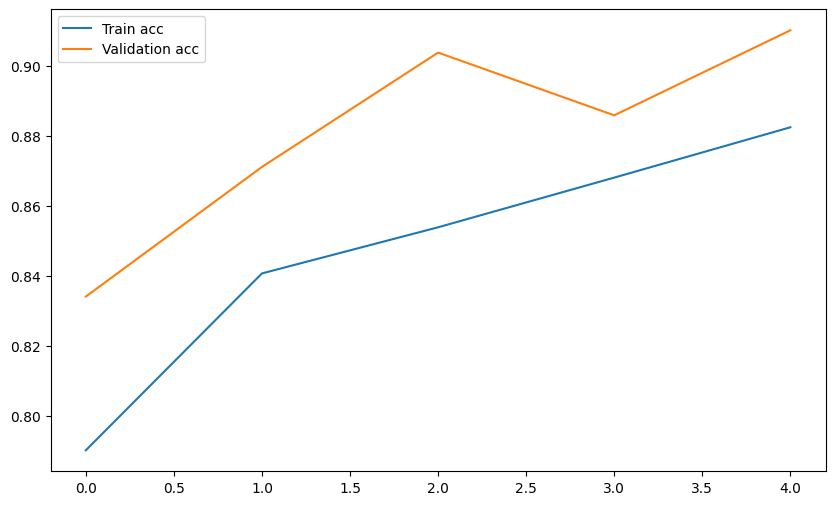

In [48]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

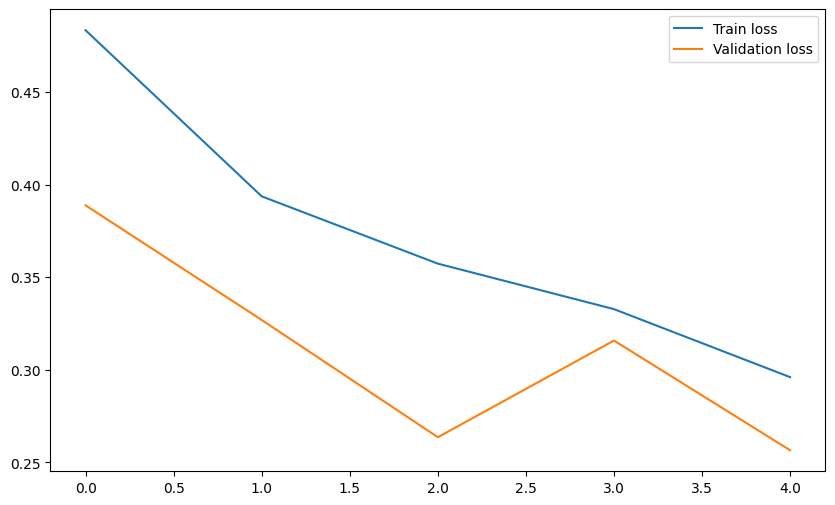

In [49]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [69]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
This image shows organic waste


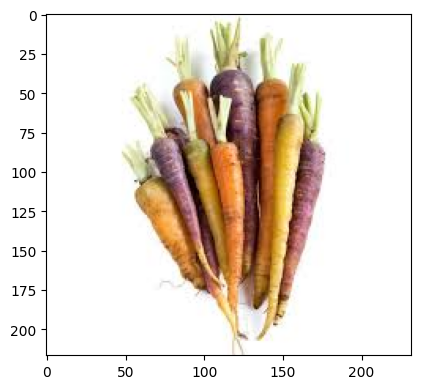

In [70]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/O/O_12574.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
This image shows recyclable waste


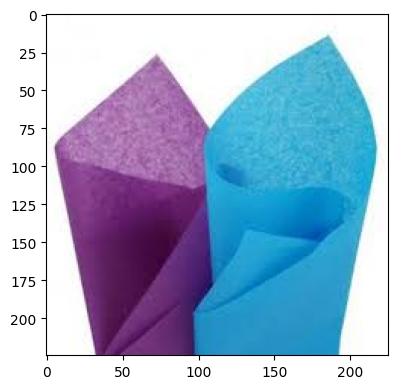

In [71]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)